# Exploratory Data Analysis on Haberman Dataset
### Author: Prajwal S(prajwalk7@gmail.com)

In [11]:
#Import packages, unzip to fetch the csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!unzip -o habermancsv.zip

Archive:  habermancsv.zip
  inflating: haberman.csv            


In [30]:
#Importing the csv file and adding names to the columns
hab_df=pd.read_csv('haberman.csv', header=None, names=['age', 'opyear', 'nodes', 'status'])
hab_df.head()

,age,opyear,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [34]:
#306 samples with 4 features in each
print('The shape of the dataset:',hab_df.shape)
print('The columns in the dataset:',hab_df.columns)

The shape of the dataset: (306, 4)
The columns in the dataset: Index(['age', 'opyear', 'nodes', 'status'], dtype='object')


# BRIEF ABOUT THE DATASET

The haberman dataset contains information about cancer patients and their survival after undergoing surgery. The columns (whose names in our dataframe are represented by the names mentioned in brackets below)  are arranged as:

1)The age at which the patient had the surgery (age)

2)The year of the surgery (opyear - 69 in the column refers to the year 1969)

3)The number of positive axillary nodes detected (nodes)

4)The survival rate of the patient (status) (1 = the patient survived 5 years or longer after the surgery and 2 = the patient died within 5 years of the surgery)


In [50]:
#The max values of the columns in the dataset
hab_df.max()

age       83
opyear    69
nodes     52
status     2
dtype: int64

In [51]:
#The min values of the columns in the dataset
hab_df.min()

age       30
opyear    58
nodes      0
status     1
dtype: int64

In [52]:
#Counting the number of people who survived and those who didnt
hab_df.status.value_counts()

1    225
2     81
Name: status, dtype: int64

In [53]:
#Displaying a statistical summary of our dataset
hab_df.describe()

,age,opyear,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


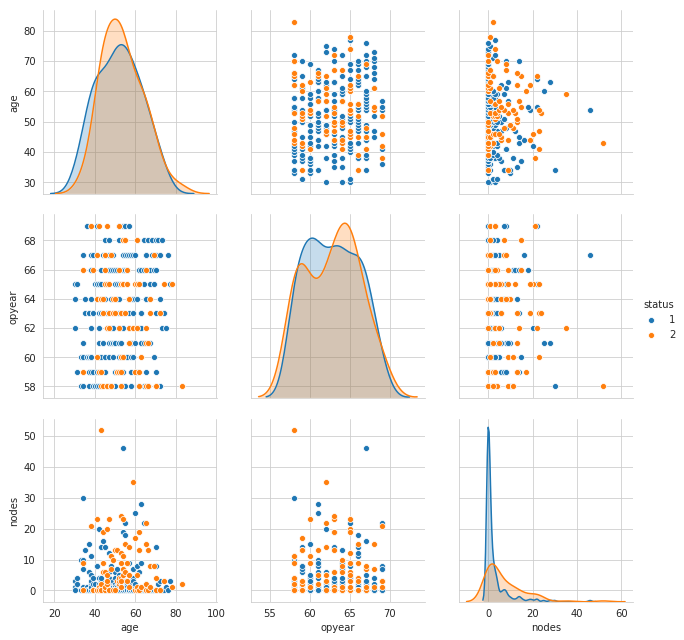

In [58]:
#Plotting a pairplot with our data and using the status as the hue
sns.set_style("whitegrid")
sns.pairplot(hab_df, hue = "status", vars = ["age", "opyear", "nodes"], size = 3)
plt.show()

From the above pair plots it is clear that not much information can be obtained as there are a lot of overlaps in the above case and hence using just one parameter such as age, axillary nodes or year of surgery, it is not possible to accurately predict who survived and who did not survive the surgery

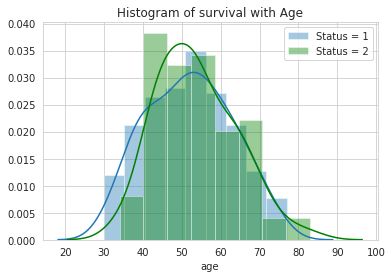

In [85]:
sns.distplot(hab_df[hab_df['status'] == 1].age, label='Status = 1')
sns.distplot(hab_df[hab_df['status'] == 2].age, color = 'g', label = 'Status = 2')
plt.title('Histogram of survival with Age')
plt.legend()
plt.show()

1)From the above histogram it is clear that the younger patients who get the surgery done at an early age have a higher probability of suriving.

2)As the age increases the chances of not surviving longer than five years also goes up as can be clearly seen from the plots above.

3)The interesting point to note from the above plot is that from the ages of 60 and higher the probablity of surviving and not surviving is equal.

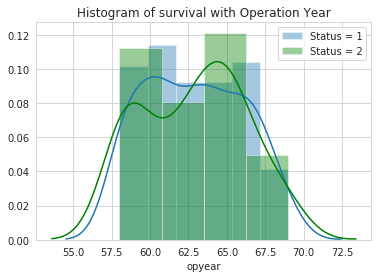

In [83]:
sns.distplot(hab_df[hab_df['status'] == 1].opyear, label='Status = 1')
sns.distplot(hab_df[hab_df['status'] == 2].opyear, color = 'g', label = 'Status = 2')
plt.legend()
plt.title('Histogram of survival with Operation Year')
plt.show()

From the above plot it is clear that the year during which the surgery was done does not really affect the rate of survival.

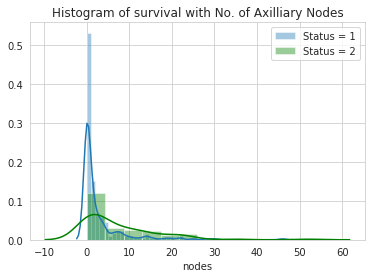

In [94]:
sns.distplot(hab_df[hab_df['status'] == 1].nodes, label='Status = 1')
sns.distplot(hab_df[hab_df['status'] == 2].nodes, color = 'g', label = 'Status = 2')
plt.legend()
plt.title('Histogram of survival with No. of Axilliary Nodes')
plt.show()

Some substantial amount of information can be got from the histogram above,the lesser the number of nodes the better the survival chances of the patient.

It is quite obvious that someone with no nodes would have the highest chances of survival and our intuition is verified from the above plot as we get a maximum peak at 0 and then it starts decreasing as the number of nodes increases.

PDF for Age: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
Bin edges for Age: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]

PDF for Operation Year: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
Bin edges for Operation Year: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF for Axilliary Nodes: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
Bin edges for Axilliary Nodes: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


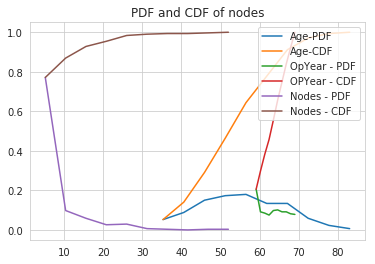

In [123]:
counts, bin_edges = np.histogram(hab_df['age'], bins = 10, density = True)
pdf = counts/(sum(counts))
print('PDF for Age:', pdf);
print('Bin edges for Age:', bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Age-PDF')
plt.plot(bin_edges[1:], cdf, label = 'Age-CDF')
plt.title('PDF and CDF of Age')

counts, bin_edges = np.histogram(hab_df['opyear'], bins=10, density = True)
pdf = counts/(sum(counts))
print('\nPDF for Operation Year:', pdf);
print('Bin edges for Operation Year:', bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'OpYear - PDF')
plt.plot(bin_edges[1:], cdf, label = 'OPYear - CDF')
plt.title('PDF and CDF of year')

#versicolor
counts, bin_edges = np.histogram(hab_df['nodes'], bins = 10, density = True)
pdf = counts/(sum(counts))
print('\nPDF for Axilliary Nodes:', pdf);
print('Bin edges for Axilliary Nodes:', bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Nodes - PDF')
plt.plot(bin_edges[1:], cdf, label = 'Nodes - CDF')
plt.title('PDF and CDF of nodes')

plt.legend(loc = 'upper right')
plt.show();

The PDF and the CDF does not help much in telling us who has survived and who has not, it just gives us the probability of the ranges of the various columns that are available in our dataset.

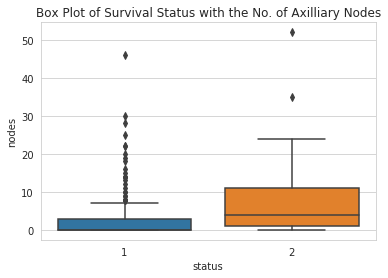

In [96]:
sns.boxplot(x = 'status', y = 'nodes', data = hab_df)
plt.title('Box Plot of Survival Status with the No. of Axilliary Nodes')
plt.show()

From the above box and whisker plot some key observations can be made in the sense that for the people who have survival status as '1' their 25% and 50% values are the same and is 0 which means that upto 50% of the people who have survived have 0 axillary nodes and also the inter quantile range is less in this case which is a way of saying that the people with survival status of '1' have very less nodes.

In the case of status '2' a large range of the people have high numer of nodes and hence their survival rate is very less and the inter quantile range is larger in this case which tells that people with survival status of '2' have more number of axilliary nodes.

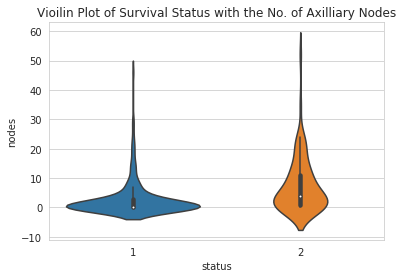

In [95]:
sns.violinplot(x = "status", y = "nodes", data=hab_df, size=3)
plt.title('Vioilin Plot of Survival Status with the No. of Axilliary Nodes')
plt.show()

Similar to the previous observations already made, we can clearly see from the above plot that the density function on the status '1' patients is narrower than those with status '2' which tells us that most of the people surviving are the ones that have fewer amount of axillary nodes.

# Conclusion
The key takeaway from the above EDA is that from all the given parameters the one that is most useful to detect the cancer survival rate is the numer of nodes, although not 100% reliable it provides us with better results and visualization as compared to the other parameters given in our dataset. The other parameters though useful to some extent fail to give highly accurate results, due to a number of overlapping datapoints.